In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# Load data
image_dir = "./../../data/training/images/"

files = os.listdir(image_dir)
n = len(files)
print("Loading " + str(n) + " images")

imgs = [Image.open(image_dir + files[i]) for i in range(n)]

# Assume all images have the same size
img0 = imgs[0]
width, height = img0.size
wh = width*height

Loading 100 images


In [4]:
# Compute input matrix X
X_list = [np.reshape(np.asarray(imgs[i]), (wh, 3)) for i in range(n)]

X = np.array(X_list)
print(X.shape)

X = X.reshape((X.shape[0]*X.shape[1], 3))
print(X.shape)

(100, 160000, 3)
(16000000, 3)


In [5]:
# Perform PCA
mX = X - X.mean(axis=0)
N = X.shape[0]
U, D, _ = np.linalg.svd(mX.T, full_matrices=False)

evals = 1/N * D**2
evecs = U

print('Eigenvalues: \n', evals)
print('Eigenvectors: \n', evecs)

Eigenvalues: 
 [6927.25308594   46.78135866   22.71954328]
Eigenvectors: 
 [[-0.59073215  0.72858809  0.34669139]
 [-0.57144203 -0.07443475 -0.81725973]
 [-0.56963982 -0.68089563  0.46031686]]


In [6]:
# Perform PCA Color Augmentation

mu, sigma = 0, 0.5

imgs_augmented = []
offsets = []

for img in imgs:
    # calc offset
    alpha = np.random.normal(mu, sigma, 3)
    offset = evecs @ (alpha * np.sqrt(evals))

    # augment image
    img = np.asarray(img)
    img_augmented = img + offset

    # correct values
    img_augmented[img_augmented<0] = 0
    img_augmented[img_augmented>255] = 255
    img_augmented = img_augmented.astype('uint8')
    
    imgs_augmented.append(img_augmented)
    offsets.append(offset)

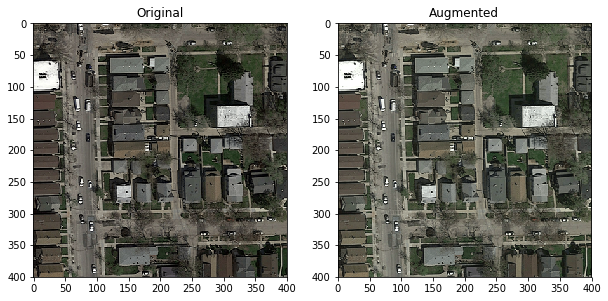

Offset:  [12.7906441  15.34944466 12.92171297]


In [7]:
# Visualize Difference

img_index = 8

f = plt.figure(figsize=(10, 20))
ax = f.add_subplot(3,2,1)
ax.set_title('Original')
plt.imshow(imgs[img_index])

ax = f.add_subplot(3,2,2)
ax.set_title('Augmented')
plt.imshow(imgs_augmented[img_index])
plt.show()

print('Offset: ', offsets[img_index])